<a href="https://colab.research.google.com/github/SanjanaYaragal/Machine-Learning/blob/main/1BM22CS417(Exam%20output).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data: house sizes (in square feet) and prices (in thousand dollars)
house_sizes = np.array([1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400])
house_prices = np.array([300, 320, 340, 360, 380, 400, 420, 440, 460, 480])


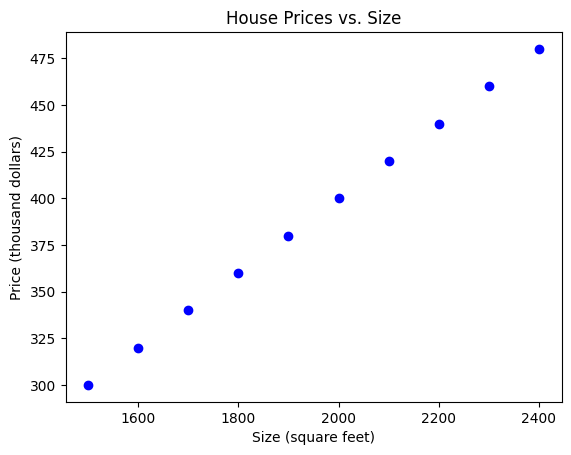

In [ ]:
plt.scatter(house_sizes, house_prices, color='blue')
plt.title('House Prices vs. Size')
plt.xlabel('Size (square feet)')
plt.ylabel('Price (thousand dollars)')
plt.show()


In [ ]:
# Reshape the data to fit the model
house_sizes = house_sizes.reshape(-1, 1)

# Create and train the model
model = LinearRegression()
model.fit(house_sizes, house_prices)

# Get the slope (m) and intercept (b) of the line
m = model.coef_[0]
b = model.intercept_

print(f'Slope (m): {m}')
print(f'Intercept (b): {b}')



Slope (m): 0.19999999999999996
Intercept (b): 1.1368683772161603e-13


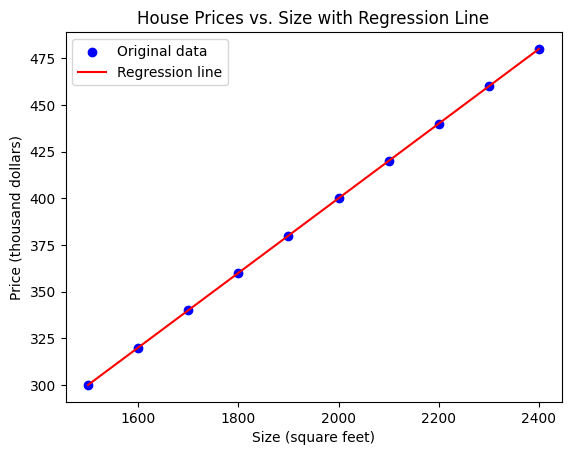

In [ ]:
# Generate predictions for the sizes
predicted_prices = model.predict(house_sizes)

# Plot the original data points
plt.scatter(house_sizes, house_prices, color='blue', label='Original data')

# Plot the regression line
plt.plot(house_sizes, predicted_prices, color='red', label='Regression line')

plt.title('House Prices vs. Size with Regression Line')
plt.xlabel('Size (square feet)')
plt.ylabel('Price (thousand dollars)')
plt.legend()
plt.show()


In [ ]:
# Predict the price of a house with size 2500 square feet
new_house_size = np.array([[2500]])
predicted_price = model.predict(new_house_size)

print(f'Predicted price for a house with size 2500 square feet: {predicted_price[0]} thousand dollars')


Predicted price for a house with size 2500 square feet: 500.0 thousand dollars


**Decision tree**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Sample data: house sizes (in square feet), number of bedrooms, and prices (in thousand dollars)
house_sizes = np.array([1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400])
num_bedrooms = np.array([3, 3, 3, 4, 4, 4, 5, 5, 5, 5])
house_prices = np.array([300, 320, 340, 360, 380, 400, 420, 440, 460, 480])

# Combine house sizes and number of bedrooms into a single array
X = np.column_stack((house_sizes, num_bedrooms))
y = house_prices


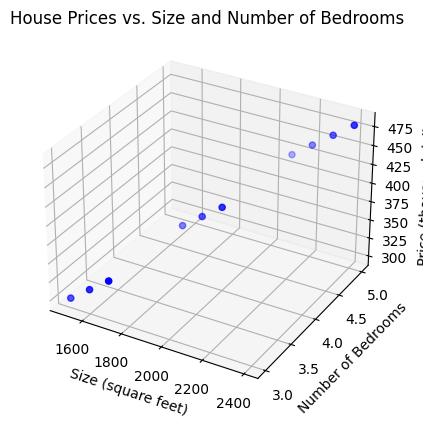

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(house_sizes, num_bedrooms, house_prices, color='blue')
ax.set_title('House Prices vs. Size and Number of Bedrooms')
ax.set_xlabel('Size (square feet)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price (thousand dollars)')
plt.show()


In [ ]:
# Create and train the decision tree regressor
model = DecisionTreeRegressor()
model.fit(X, y)


DecisionTreeRegressor()

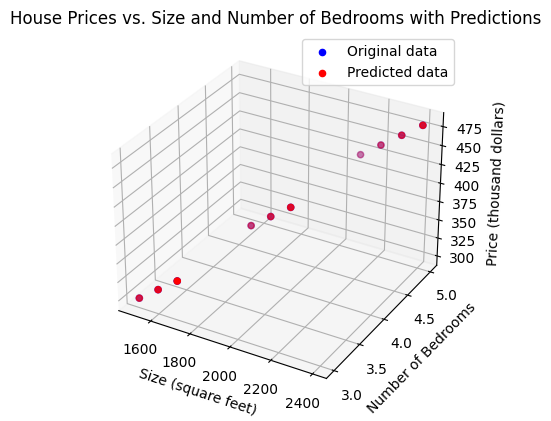

In [ ]:
# Generate predictions for the input data
predicted_prices = model.predict(X)

# Plot the original data points and predicted values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(house_sizes, num_bedrooms, house_prices, color='blue', label='Original data')
ax.scatter(house_sizes, num_bedrooms, predicted_prices, color='red', label='Predicted data')
ax.set_title('House Prices vs. Size and Number of Bedrooms with Predictions')
ax.set_xlabel('Size (square feet)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price (thousand dollars)')
ax.legend()
plt.show()


In [ ]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y, predicted_prices)
r2 = r2_score(y, predicted_prices)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.0
R-squared: 1.0


In [ ]:
# Predict the price of a house with size 2500 square feet and 4 bedrooms
new_house_features = np.array([[2500, 4]])
predicted_price = model.predict(new_house_features)

print(f'Predicted price for a house with size 2500 square feet and 4 bedrooms: {predicted_price[0]} thousand dollars')


Predicted price for a house with size 2500 square feet and 4 bedrooms: 480.0 thousand dollars


**Comparison:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2].reshape(-1, 1)  # Using petal length as the feature
y = iris.data[:, 3]  # Using petal width as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [2]:
# Train Simple Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred_lr = linear_reg.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Simple Linear Regression - MSE: {mse_lr}, R^2: {r2_lr}')


Simple Linear Regression - MSE: 0.03528545372428444, R^2: 0.9445739521923764


In [3]:
# Train Decision Tree model
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree - MSE: {mse_tree}, R^2: {r2_tree}')


Decision Tree - MSE: 0.03170084873353607, R^2: 0.9502046148768108


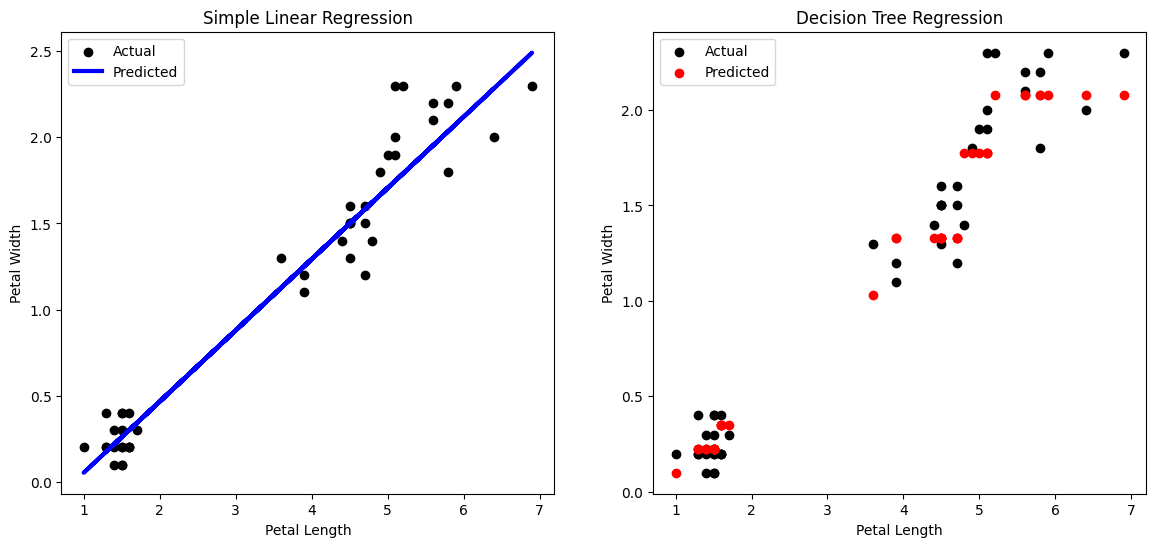

In [4]:
# Plot the results
plt.figure(figsize=(14, 6))

# Plot Simple Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred_lr, color='blue', linewidth=3, label='Predicted')
plt.title('Simple Linear Regression')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

# Plot Decision Tree
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred_tree, color='red', label='Predicted')
plt.title('Decision Tree Regression')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

plt.show()


Simple Linear Regression - MSE: 0.03528545372428444, R^2: 0.9445739521923764
Decision Tree - MSE: 0.03170084873353607, R^2: 0.9502046148768108


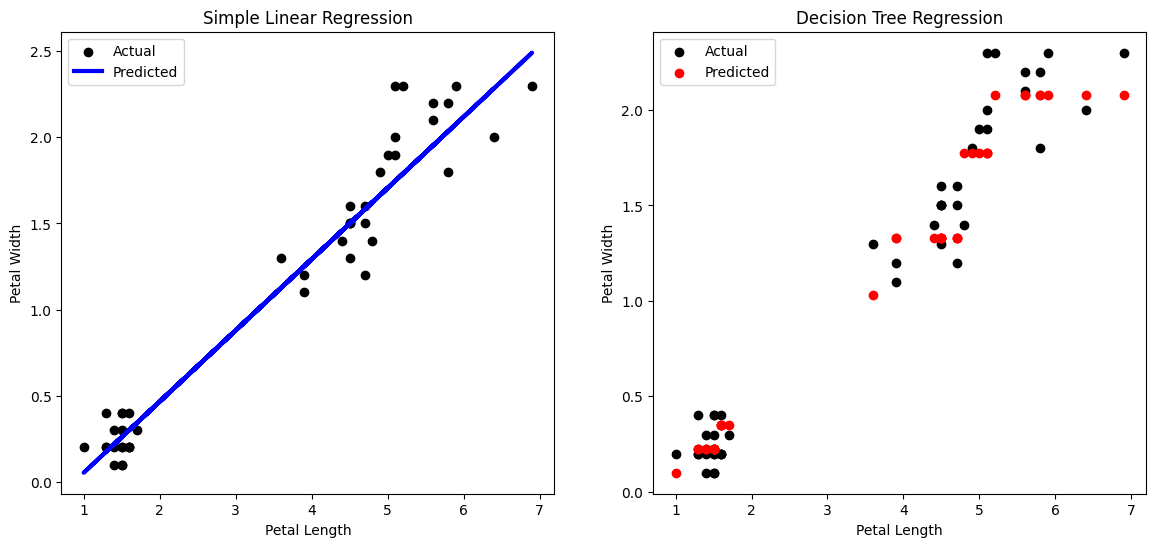

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2].reshape(-1, 1)  # Using petal length as the feature
y = iris.data[:, 3]  # Using petal width as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Simple Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions with Simple Linear Regression
y_pred_lr = linear_reg.predict(X_test)

# Evaluate Simple Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Train Decision Tree model
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train, y_train)

# Make predictions with Decision Tree
y_pred_tree = tree_reg.predict(X_test)

# Evaluate Decision Tree
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Print evaluation metrics
print(f'Simple Linear Regression - MSE: {mse_lr}, R^2: {r2_lr}')
print(f'Decision Tree - MSE: {mse_tree}, R^2: {r2_tree}')

# Plot the results
plt.figure(figsize=(14, 6))

# Plot Simple Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred_lr, color='blue', linewidth=3, label='Predicted')
plt.title('Simple Linear Regression')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

# Plot Decision Tree
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred_tree, color='red', label='Predicted')
plt.title('Decision Tree Regression')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

plt.show()
